In [3]:
import torch
import numpy as np
import pandas as pd
from torch.utils.data import Dataset

# Simple Dataset

In [4]:
# Define class for dataset

class toy_set(Dataset):
    
    # Constructor with defult values 
    def __init__(self, length = 100, transform = None):
        self.len = length
        self.x = 2 * torch.ones(length, 2)
        self.y = torch.ones(length, 1)
        self.transform = transform
     
    # Getter
    def __getitem__(self, index):
        sample = self.x[index], self.y[index]
        if self.transform:
            sample = self.transform(sample)     
        return sample
    
    # Get Length
    def __len__(self):
        return self.len
    

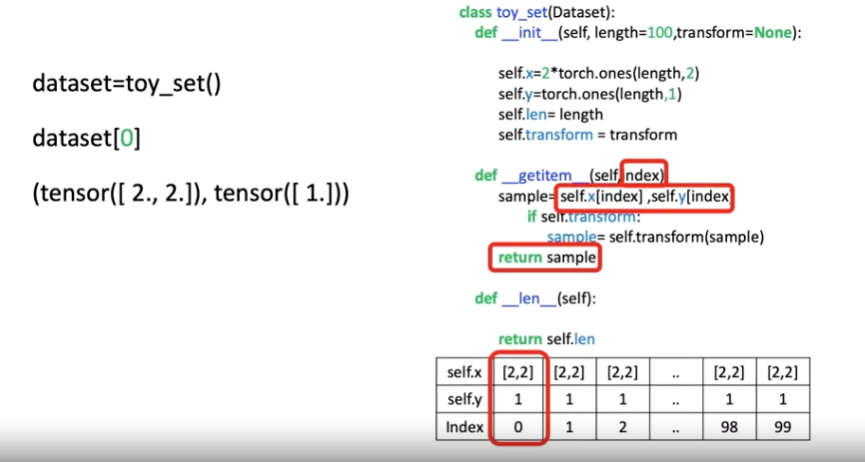

In [7]:
dataset = toy_set()
len(dataset) # shows num of elements

# as you can see from the img above this will return the element for x and y (this logic is the same as normal lists)
dataset[0]

(tensor([2., 2.]), tensor([1.]))

# Transforms
- ex normalize or standarize the data

-- note that we will use pandas for this type of stuff instead

In [8]:
# so the tutorial insists on creating callable classes that will apply transforms to our dataset
# but I think irl we would use some pytorch method otherwise why have pytorch as a lib 

# Create tranform class add_mult

class add_mult(object):
    
    # Constructor
    def __init__(self, addx = 1, muly = 2):
        self.addx = addx
        self.muly = muly
    
    # Executor
    def __call__(self, sample):
        x = sample[0]
        y = sample[1]
        x = x + self.addx
        y = y * self.muly
        sample = x, y
        return sample

In [11]:
dataset = toy_set() # creates dataset object
a_m = add_mult() # creates transform object
x_, y_ = a_m(dataset[0]) # applies transform to dataset
print(x_, y_)

tensor([3., 3.]) tensor([2.])


# Transforms Compose 
- running several transforms in series 

In [12]:
# Create tranform class mult

class mult(object):
    
    # Constructor
    def __init__(self, mult = 100):
        self.mult = mult
        
    # Executor
    def __call__(self, sample):
        x = sample[0]
        y = sample[1]
        x = x * self.mult
        y = y * self.mult
        sample = x, y
        return sample

In [13]:
from torchvision import transforms

# note that we pass a comma separated list of the transforms we would like to use in the correct order
# this seems somewhat similar to a pipe in scikit
data_transform = transforms.Compose([add_mult(), mult()])

x_, y_ = data_transform(dataset[0])